<a href="https://colab.research.google.com/github/vinayak-tripathi/DA-Lab/blob/main/DA_Lab_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv("/content/drive/MyDrive/data/climate_change.csv")

In [21]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [22]:
data.drop(['Year','Month'],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEI       308 non-null    float64
 1   CO2       308 non-null    float64
 2   CH4       308 non-null    float64
 3   N2O       308 non-null    float64
 4   CFC-11    308 non-null    float64
 5   CFC-12    308 non-null    float64
 6   TSI       308 non-null    float64
 7   Aerosols  308 non-null    float64
 8   Temp      308 non-null    float64
dtypes: float64(9)
memory usage: 21.8 KB


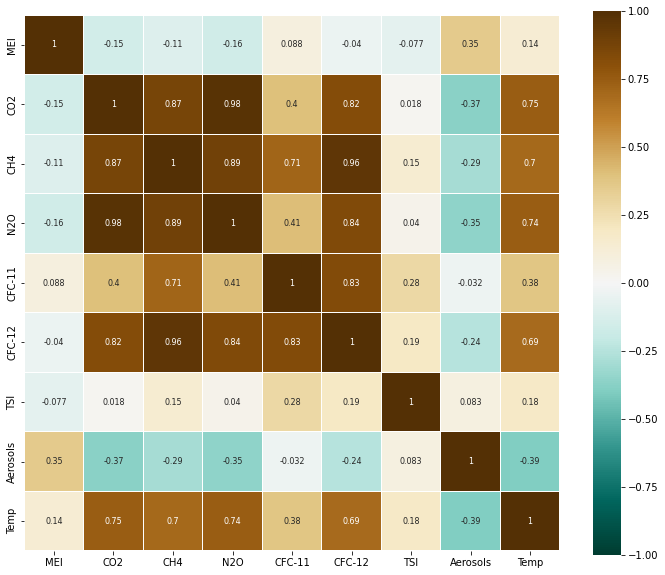

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), 
            cmap="BrBG_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test,y_train, y_test = train_test_split(X,y , 
                                    test_size=0.2, 
                                    random_state = 1)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.7581915378710181

In [7]:
model.predict(X_test).shape

(62,)

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant


x_incl_cons = sm.add_constant(X)
model = sm.OLS(y, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,5)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-127.695776,0.00000
MEI,0.066322,0.00000
CO2,0.005207,0.01817
CH4,0.000064,0.89823
N2O,-0.016929,0.03153
CFC-11,-0.007278,0.00000
CFC-12,0.004272,0.00000
TSI,0.095862,0.00000
Aerosols,-1.581837,0.00000


In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           8.21e-84
Time:                        09:16:42   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.6958     19.191     -6.654      0.0

We can see that the columns CO2,CH4,N20 has p value greater than 0.01. So we will drop these columns

In [28]:
data.drop(columns = ['CO2','CH4', 'N2O'],axis=1, inplace=True)
X = data.iloc[:,:-1]
x_incl_cons = sm.add_constant(X)
model = sm.OLS(y,x_incl_cons)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.01e-85
Time:                        09:16:49   Log-Likelihood:                 299.72
No. Observations:                 308   AIC:                            -587.4
Df Residuals:                     302   BIC:                            -565.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.2118     19.126     -6.651      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The r value decreases by the value of 0.02 upon removing the columns

In [29]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test,y_train, y_test = train_test_split(X,y , 
                                    test_size=0.2, 
                                    random_state = 1)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.7757007210855302

The accuracy increases by 2% when we removed the columns with the p-value greater than 0.01.<br>
We can thus infer that the increased the accuracy of the model by removing the columns with less correlation with the target valriable